## Final Project - Infinate Recharge - Power Cell Recognition

The following two functions are written to train a binary linear classifier. The first function "Apre" preprocesses the images and organizes them to train the classifier. The first attempt uses two image preprocessing steps. The image is blurred and then converted to a grayscale image using the open computer vision library. This results in a matrix of values between 0 and 255 which is rearranged into a matrix with each row representing an image. The second function "extractLabels" checks to see if there is data in the 'objects' section of the labels if no data exists is places a -1 in the label vector "y". 

In [4]:
# Importing Images to Python if they are jpgs
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.image as mpimg
import cv2   # Open Computer vision
import glob
import json  # JavaScript Object Notation encoder and decoder

# This Function takes and returns a 2 dimensional Pre-processed matrix of features and instances for classifying a linear clasifier
def Apre(images):
    n = len(images) # The number of images in the file
    
    # The dimensions of the images
    row = 480 
    col = 640
    
    # The length of each new row
    scale_percent = 25 # percent of original size
    length = int((480*scale_percent/100)*(640*scale_percent/100))
        
    # creating a new A matrix for pre processed data
    A = np.zeros((n,length))
    
    for i in range(n):
        A1 = np.array(images.pop()) # pops an image out of the list
        # print(type(A1))
        
        ###################################################################
        # Preprocessing Data goes here
        ###################################################################
        
        # Blurring the Image
        # Ab = cv2.medianBlur(A1,15)
        
        # Converting to Grayscale
        Ag = cv2.cvtColor(A1, cv2.COLOR_RGB2GRAY)
        # print(type(Ag))
        
        # resizing the image to reduce the number of features
        scale_percent = 25 # percent of original size
        width = int(Ag.shape[1] * scale_percent / 100)
        height = int(Ag.shape[0] * scale_percent / 100)
        dim = (width, height)
        # resize image
        grayResized = cv2.resize(Ag, dim, interpolation = cv2.INTER_AREA)
        
        ########## start of the template matching code #########
        
        # loading a ball template for template matching of balls
        temp = plt.imread("C:\\Users\\PDills\\Documents\\GradSchoolCourses\\CS-ECE-ME 532\\Final Project\\BallTemplate2.jpg")
        
        # Converting to Grayscale
        grayTemp = cv2.cvtColor(temp, cv2.COLOR_RGB2GRAY)

        # resizing the image to reduce the number of features and the 
        width = int(grayTemp.shape[1] * scale_percent / 100)
        height = int(grayTemp.shape[0] * scale_percent / 100)
        dim = (width, height)
        # resize image
        grayResizedTemp = cv2.resize(grayTemp, dim, interpolation = cv2.INTER_AREA)
        
        # template matching with the ball image
        #   cv::TM_SQDIFF = 0,
        #   cv::TM_SQDIFF_NORMED = 1,
        #   cv::TM_CCORR = 2,
        #   cv::TM_CCORR_NORMED = 3,
        #   cv::TM_CCOEFF = 4,
        #   cv::TM_CCOEFF_NORMED = 5
        res = cv2.matchTemplate(grayResized.astype(np.float32),grayResizedTemp.astype(np.float32),2) # expects a float
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
        res = res.astype(np.float32)

        
        ###################################################################
        
        
        # Reshaping the image into an array and storing into a matrix
        # A[i,:] = np.reshape(Ag,(1,length))
        A[i,:] = np.reshape(grayResized,(1,length))
        # A[i,:] = np.reshape(res,(1,length))
        # print(len(A[0]))
    
    return A # Returns an A matrix of pre processed pixles from each image in the specified file path

In [5]:
# This function extracts binary classification lables from the data lable files in the specified path
def extractLabels(lables):
    # labels is a list with all the json lables for the annotations in the path
    n = len(lables)
    
    y = np.zeros((n,1))
    for i in range(n):
        text = labels.pop()
        stringData = text.read().replace("\n", " ")

        data = json.loads(stringData)
        if data['objects'] == []:
            y[i] = -1 # no power cells are present
        else:
            y[i] = 1 # power cells are in the image

    return [y] # Returns a vecotor of binary classification labels (ie 1 for PowerCells and -1 for No PowerCells )

## Start of Binary Classifier Training of JPG (Images)

In [6]:
# Reads all the images from the folder specified in the path and stros them in a list data structure
images = [plt.imread(file) for file in glob.glob("C:\\Users\\PDills\\Documents\\GradSchoolCourses\\CS-ECE-ME 532\\Final Project\\Completely Labeled Dataset for balls\\Filming Day 2 Video\\img\\*.png")]

A1 = np.array(Apre(images)) # calling the function to organize that data in the specified folder

# Reads out all the lable data and stores it in a data structure
labels = [open(file) for file in glob.glob("C:\\Users\\PDills\\Documents\\GradSchoolCourses\\CS-ECE-ME 532\\Final Project\\Completely Labeled Dataset for balls\\Filming Day 2 Video\\ann\\*.json")]

y1 = np.array(extractLabels(labels)) # calling the function to form binary labels
y1 = np.reshape(y1,(len(y1[0]),1))
# print(y2)

In [7]:
# Reads all the images from the folder specified in the path and stros them in a list data structure
images = [plt.imread(file) for file in glob.glob("C:\\Users\\PDills\\Documents\\GradSchoolCourses\\CS-ECE-ME 532\\Final Project\\Completely Labeled Dataset for balls\\Filming Day 2 Video\\img\\*.png")]

A2 = np.array(Apre(images)) # calling the function to organize that data in the specified folder

# Reads out all the lable data and stores it in a data structure
labels = [open(file) for file in glob.glob("C:\\Users\\PDills\\Documents\\GradSchoolCourses\\CS-ECE-ME 532\\Final Project\\Completely Labeled Dataset for balls\\Filming Day 2 Video\\ann\\*.json")]

y2 = np.array(extractLabels(labels)) # calling the function to form binary labels
y2 = np.reshape(y2,(len(y2[0]),1))
# print(y2)

In [44]:
# Creating a larger array from the two data files read in
A = np.vstack((A1,A2))
y = np.vstack((y1,y2))

In [91]:
# This code block performs cross validation of the classifier with the following steps:
# 1) Randomize the data while keeping the lables and training data associated with each other.
# 2) Split the data into "k" datasets.
# 3) Use "k-1" of these datasets for training and the the holdout set for error rate testing.
# 4) repeat this for the each of the possible combinations of the data and calculate the average classification error

# 1) Randomize the data while keeping the lables and training data associated with each other.
rdata = np.hstack((A,y)) # the last column of the matrix is the label
np.random.shuffle(rdata)

Ar = rdata[:,0:len(A[0])]
yr = rdata[:,len(A[0]):len(rdata[0])]

# 2) splitting into "k" datasets
k = 10
n = len(Ar)/k # The number of rows in a dataset

Adata = np.zeros((int(n),len(Ar[0]),k))
ydata = np.zeros((int(n),1,k))
for i in range(k):
    Adata[:,:,i] = Ar[i*int(n):(i+1)*int(n),:]
    ydata[:,:,i] = yr[i*int(n):(i+1)*int(n),:]

# 3 and 4 ) re arranging into the "k-1" dataset and holdout data and calculating average classification error
Atrain = np.zeros((int((k-1)*n),len(Ar[0])))
ytrain = np.zeros((int((k-1)*n),1))

Ahold = np.zeros((int(n),len(Ar[0])))
yhold = np.zeros((int(n),1))

Terr = 0 # The total average error for a final number
for i in range(k):
    Ahold = Adata[:,:,i]
    yhold = ydata[:,:,i]
    ctr = 0
    for j in range(k):
        if i != j:
            Atrain[int(ctr*n):int((ctr+1)*n),:] = Adata[:,:,ctr]
            ytrain[int(ctr*n):int((ctr+1)*n),:] = ydata[:,:,ctr]
            ctr = ctr + 1
            
    # Calculating the singular values of the training data
    U,s,VT = np.linalg.svd(Atrain,full_matrices=False)
    
    # Selecting data for feature reduction using a Truncated Singular Value approximation
    r = 500 # the number of singular values to retain

    Ur = U[:,0:r]
    Er = np.diag(s[0:r])
    Vr = np.transpose(VT[0:r,:])
    
    # SVD definition of the Psudo Inverse (Least Squares Training)
    w = Vr@np.linalg.inv(Er)@Ur.T@ytrain
    
    # counting classification errors in the holdout set
    yOut = np.zeros((len(y)) )
    eC = 0 # The Error Counter
    for ctr2 in range(len(yhold)):
        yOut[ctr2] = np.sign(Ahold[ctr2,:]@w)
    
        # Counting Classification Errors from the Calculated Weights
        if yOut[ctr2] != yhold[ctr2]:
            eC = eC + 1
    print('Binary classification error rate on training data', (eC/len(yhold))*100,'%')
    Terr = Terr + (eC/len(yhold))
print('\n')
# Total Average error
print('The Average Error is: ',(Terr/k)*100,'%')


Binary classification error rate on training data 9.788359788359788 %
Binary classification error rate on training data 10.317460317460316 %
Binary classification error rate on training data 12.16931216931217 %
Binary classification error rate on training data 6.613756613756613 %
Binary classification error rate on training data 9.523809523809524 %
Binary classification error rate on training data 10.582010582010582 %
Binary classification error rate on training data 7.671957671957672 %
Binary classification error rate on training data 10.846560846560847 %
Binary classification error rate on training data 11.904761904761903 %
Binary classification error rate on training data 13.756613756613756 %


The Average Error is:  10.317460317460316


In [93]:
len(s)

3402

In [90]:
len(yhold)

378

Using least a least squares solution imediately is not a tractable optimization problem becasue one row of the the "A" matrix representing a single image has ~ 30 thousand entries. Insted we attempt to reduce the dimension of the optimization problem using a truncated singular value decomposition. 

In [ ]:
# Complete and uncomment line below
U,s,VT = np.linalg.svd(A,full_matrices=False)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.log10(s))
ax.set_xlabel('Singular value index $i$', fontsize=16)
ax.set_ylabel('$\log_{10}(\sigma_i)$', fontsize=16)
ax.set_title('Singular Values', fontsize=18)
plt.grid()
plt.show()

In [136]:
# Selecting data for feature reduction using a Truncated Singular Value approximation
r = 1500 # the number of singular values to retain

Ur = U[:,0:r]
Er = np.diag(s[0:r])
Vr = np.transpose(VT[0:r,:])


This first attempt at a binary classifier simply uses the definition of the psudo inverse in terms of the SVD to reduce the number of features and more efficiently compute the psudoinvese.

In [137]:
# SVD definition of the Psudo Inverse
w = Vr@np.linalg.inv(Er)@Ur.T@y
print(len(w))

19200


The code block below looks at the classification error for the training data. to help decide how many singular values to keep.

In [138]:
yOut = np.zeros((len(y)) )
eC = 0 # The Error Counter
for i in range(len(A)):
    yOut[i] = np.sign(A[i,:]@w)
    
    # Counting Classification Errors from the Calculated Weights
    if yOut[i] != y[i]:
        eC = eC + 1
print('Binary classification error rate on training data', (eC/len(y))*100,'%')

Binary classification error rate on training data 1.164021164021164 %


In [139]:
print(y.T)
print(yOut.T)

[[-1. -1. -1. ...  1.  1.  1.]]
[-1. -1. -1. ...  1.  1.  1.]


## Classification Error Rate on Holdout data (Day 1 Images) 

In [140]:
# Reads all the images from the folder specified in the path and stros them in a list data structure
images = [plt.imread(file) for file in glob.glob("C:\\Users\\PDills\\Documents\\GradSchoolCourses\\CS-ECE-ME 532\\Final Project\\Completely Labeled Dataset for balls\\Filming Day 1 Images\\img\\*.jpg")]

Ah = np.array(Apre(images)) # calling the function to organize that data in the specified folder

# Reads out all the lable data and stores it in a data structure
labels = [open(file) for file in glob.glob("C:\\Users\\PDills\\Documents\\GradSchoolCourses\\CS-ECE-ME 532\\Final Project\\Completely Labeled Dataset for balls\\Filming Day 1 Images\\ann\\*.json")]

yh = np.array(extractLabels(labels)) # calling the function to form binary labels
yh = np.reshape(yh,(len(yh[0]),1))
# print(y1)

In [141]:
yhOut = np.zeros((len(yh)) )
eC = 0 # The Error Counter
for i in range(len(Ah)):
    yhOut[i] = np.sign(Ah[i,:]@w)
    
    # Counting Classification Errors from the Calculated Weights
    if yhOut[i] != yh[i]:
        eC = eC + 1
print('Binary classification error rate on holdout data', (eC/len(yh))*100,'%')

Binary classification error rate on holdout data 45.45454545454545 %


In [90]:
print(yh.T)
print(yhOut.T)

[[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
  -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
  -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
  -1. -1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.]]
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.]


### Testing image resizing code to decrease the number of features

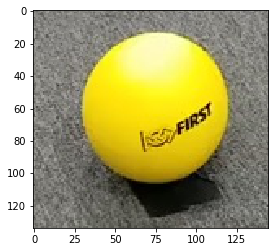

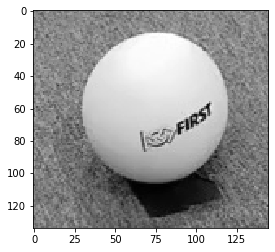

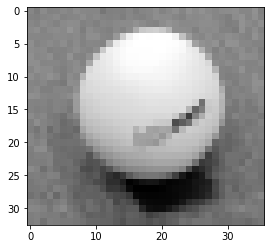

In [101]:
# loading a ball template for template matching of balls
temp = plt.imread("C:\\Users\\PDills\\Documents\\GradSchoolCourses\\CS-ECE-ME 532\\Final Project\\BallTemplate2.jpg")
plt.imshow(temp)
plt.show()

# Converting to Grayscale
grayTemp = cv2.cvtColor(temp, cv2.COLOR_RGB2GRAY)
plt.imshow(grayTemp,cmap='gray')
plt.show()

# resizing the image to reduce the number of features and the 
scale_percent = 25 # percent of original size
width = int(grayTemp.shape[1] * scale_percent / 100)
height = int(grayTemp.shape[0] * scale_percent / 100)
dim = (width, height)
# resize image
grayResizedTemp = cv2.resize(grayTemp, dim, interpolation = cv2.INTER_AREA)
plt.imshow(grayResizedTemp, cmap='gray')
plt.show()

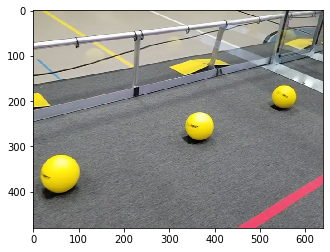

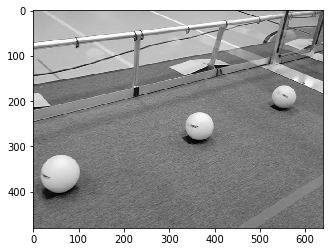

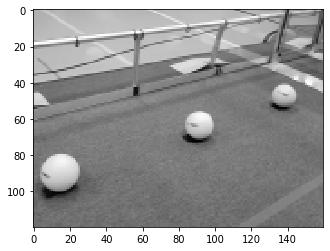

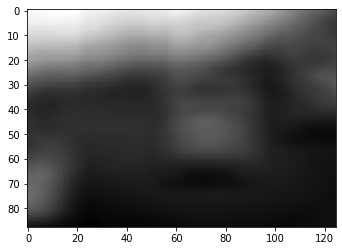

In [108]:
# "pops" the image from the list 
A = images.pop(100)
plt.imshow(A)
plt.show()

# Blurring the Image
# A = cv2.medianBlur(A,15)
#plt.imshow(A)
#plt.show()

# Converting to Grayscale
gray = cv2.cvtColor(A, cv2.COLOR_RGB2GRAY)
plt.imshow(gray,cmap='gray')
plt.show()

# resizing the image to reduce the number of features
scale_percent = 25 # percent of original size
width = int(gray.shape[1] * scale_percent / 100)
height = int(gray.shape[0] * scale_percent / 100)
dim = (width, height)
# resize image
grayResized = cv2.resize(gray, dim, interpolation = cv2.INTER_AREA)
plt.imshow(grayResized.astype(np.float32), cmap='gray')
plt.show()

# template matching with the ball image
#   cv::TM_SQDIFF = 0,
#   cv::TM_SQDIFF_NORMED = 1,
#   cv::TM_CCORR = 2,
#   cv::TM_CCORR_NORMED = 3,
#   cv::TM_CCOEFF = 4,
#   cv::TM_CCOEFF_NORMED = 5
res = cv2.matchTemplate(grayResized.astype(np.float32),grayResizedTemp.astype(np.float32),2) # expects a 
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
plt.imshow(res.astype(np.float32), cmap='gray')
plt.show()